In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=500, shuffle=True, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print('Formatos')
print(f'Linhas de X: {X.shape[0]} || Colunas de X: {X.shape[1]}')
print(f'Linhas de y: {y.shape[0]} || Colunas de y: {1}')

Formatos
Linhas de X: 500 || Colunas de X: 2
Linhas de y: 500 || Colunas de y: 1


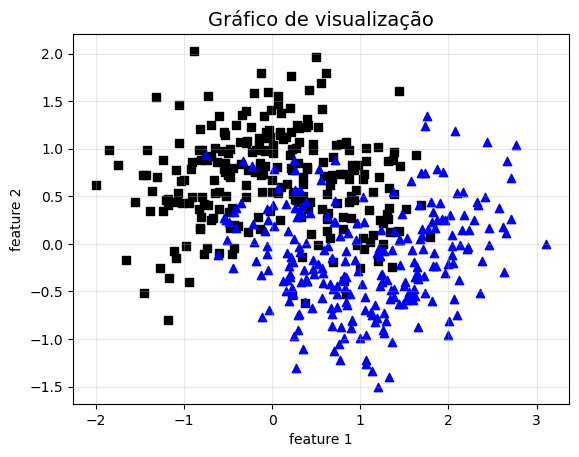

In [32]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker='s', c='k')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker='^', c='b')
plt.xlabel('feature 1', size=10)
plt.ylabel('feature 2', size=10)
plt.title('Gráfico de visualização', size=14)
plt.grid(alpha=0.3)

In [33]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', degree=20, C=0.5)

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_true=y_test, y_pred=svc_pred)

array([[66,  9],
       [18, 57]], dtype=int64)

In [35]:
print(f'{accuracy_score(y_test, svc_pred)*100}%')

82.0%


In [36]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

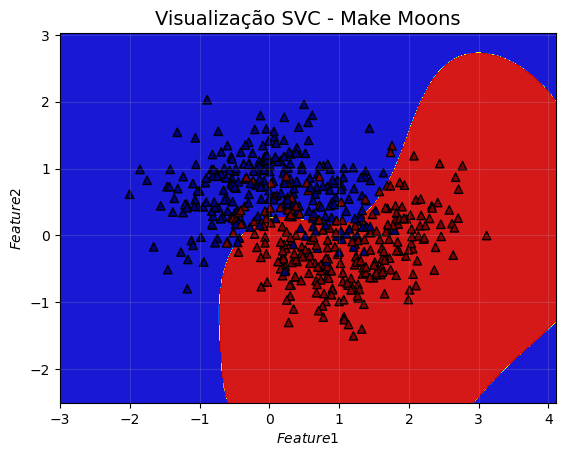

In [37]:
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.9)
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', marker='^', cmap=plt.cm.jet, c=y)
plt.title('Visualização SVC - Make Moons', size=14)
plt.xlabel('$Feature 1$')
plt.ylabel('$Feature 2$')
plt.grid(alpha=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=80, n_jobs=-1, random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, random_state=42)

In [39]:
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

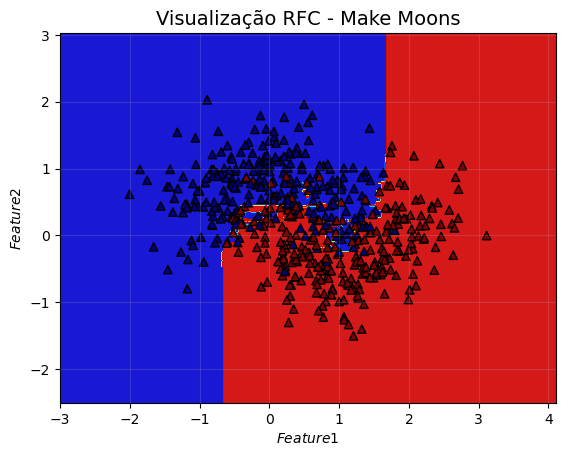

In [40]:
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.9)
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', marker='^', cmap=plt.cm.jet, c=y)
plt.title('Visualização RFC - Make Moons', size=14)
plt.xlabel('$Feature 1$')
plt.ylabel('$Feature 2$')
plt.grid(alpha=0.2)